Cyberbully Detection

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load the dataset
data = pd.read_csv('cyberbullying_tweets.csv')

In [3]:
data.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [4]:
data.shape

(47692, 2)

In [22]:
label_counts = data["cyberbullying_type"].value_counts()
label_counts

cyberbullying_type
religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: count, dtype: int64

In [5]:
# Descriptive statistics for the 'label' column
label_stats = data["cyberbullying_type"].describe()
# Word count statistics for the 'message' column
data["word_count"] = data["tweet_text"].apply(lambda x: len(str(x).split()))
word_count_stats = data["word_count"].describe()


print(label_stats)
print(word_count_stats)

count        47692
unique           6
top       religion
freq          7998
Name: cyberbullying_type, dtype: object
count    47692.000000
mean        23.704835
std         15.434881
min          1.000000
25%         13.000000
50%         20.000000
75%         32.000000
max        790.000000
Name: word_count, dtype: float64


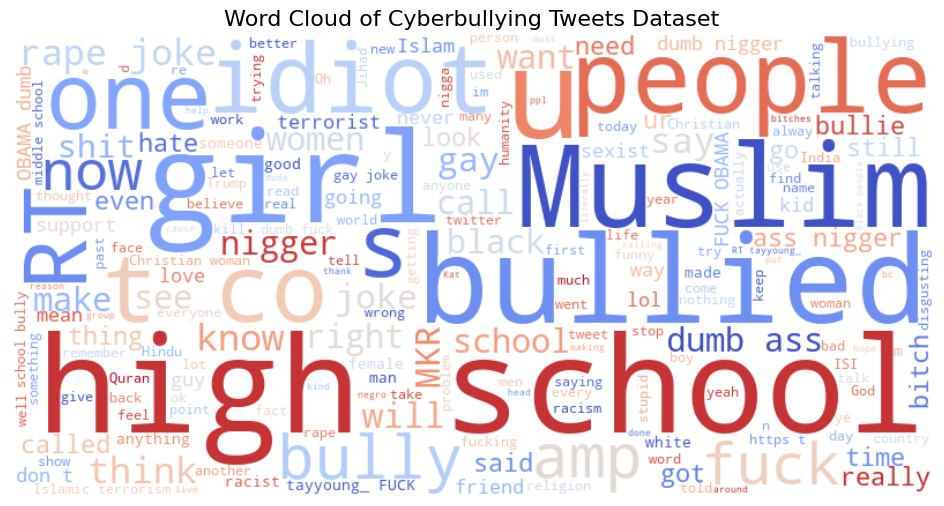

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Combine all text data for word cloud generation
all_text = " ".join(data["tweet_text"].astype(str))

# Generate the word cloud
wordcloud = WordCloud(
    width=800, height=400, background_color="white", colormap="coolwarm"
).generate(all_text)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Cyberbullying Tweets Dataset", fontsize=16)
plt.show()

In [6]:
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


# Function to clean the tweet text
def clean_text(text):
    text = re.sub(r"http\S+", "", text)  # Remove URLs
    text = re.sub(r"@\w+", "", text)  # Remove mentions
    text = re.sub(r"#\w+", "", text)  # Remove hashtags
    text = re.sub(r"[^\w\s]", "", text)  # Remove punctuation
    text = text.lower().strip()  # Convert to lowercase and remove extra spaces
    return text


# Clean the tweet_text column
data["cleaned_text"] = data["tweet_text"].apply(clean_text)

# Encode labels (cyberbullying_type)
label_encoder = LabelEncoder()
data["label"] = label_encoder.fit_transform(data["cyberbullying_type"])

# Split the dataset into train and test sets
X = data["cleaned_text"]
y = data["label"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Check the cleaned and encoded dataset
data[["cleaned_text", "label"]].head(), X_train.shape, X_test.shape

(                                        cleaned_text  label
 0         in other words  your food was crapilicious      3
 1                                   why is  so white      3
 2         a classy whore or more red velvet cupcakes      3
 3  meh p  thanks for the heads up but not too con...      3
 4  this is an isis account pretending to be a kur...      3,
 (38153,),
 (9539,))

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Convert text data into TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train the SVM classifier
svm_classifier = SVC(kernel="linear", random_state=42)
svm_classifier.fit(X_train_tfidf, y_train)

# Predict and evaluate the SVM model
svm_predictions = svm_classifier.predict(X_test_tfidf)
svm_report = classification_report(
    y_test, svm_predictions, target_names=label_encoder.classes_
)

svm_report

'                     precision    recall  f1-score   support\n\n                age       0.96      0.97      0.96      1603\n          ethnicity       0.98      0.97      0.98      1603\n             gender       0.88      0.81      0.84      1531\n  not_cyberbullying       0.54      0.54      0.54      1624\nother_cyberbullying       0.56      0.62      0.59      1612\n           religion       0.96      0.93      0.94      1566\n\n           accuracy                           0.81      9539\n          macro avg       0.81      0.81      0.81      9539\n       weighted avg       0.81      0.81      0.81      9539\n'

In [8]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)
nb_predictions = nb_classifier.predict(X_test_tfidf)
nb_report = classification_report(
    y_test, nb_predictions, target_names=label_encoder.classes_
)



nb_report

'                     precision    recall  f1-score   support\n\n                age       0.84      0.94      0.89      1603\n          ethnicity       0.89      0.87      0.88      1603\n             gender       0.78      0.76      0.77      1531\n  not_cyberbullying       0.57      0.40      0.47      1624\nother_cyberbullying       0.53      0.53      0.53      1612\n           religion       0.77      0.95      0.85      1566\n\n           accuracy                           0.74      9539\n          macro avg       0.73      0.74      0.73      9539\n       weighted avg       0.73      0.74      0.73      9539\n'

In [9]:
# Train the Logistic Regression classifier
logreg_classifier = LogisticRegression(max_iter=1000, random_state=42)
logreg_classifier.fit(X_train_tfidf, y_train)
logreg_predictions = logreg_classifier.predict(X_test_tfidf)
logreg_report = classification_report(
    y_test, logreg_predictions, target_names=label_encoder.classes_
)

logreg_report

'                     precision    recall  f1-score   support\n\n                age       0.96      0.97      0.97      1603\n          ethnicity       0.98      0.97      0.97      1603\n             gender       0.88      0.80      0.84      1531\n  not_cyberbullying       0.54      0.54      0.54      1624\nother_cyberbullying       0.56      0.62      0.59      1612\n           religion       0.94      0.93      0.94      1566\n\n           accuracy                           0.80      9539\n          macro avg       0.81      0.81      0.81      9539\n       weighted avg       0.81      0.80      0.81      9539\n'

SVM Accuracy: 0.81
Naive Bayes Accuracy: 0.74
Logistic Regression Accuracy: 0.80


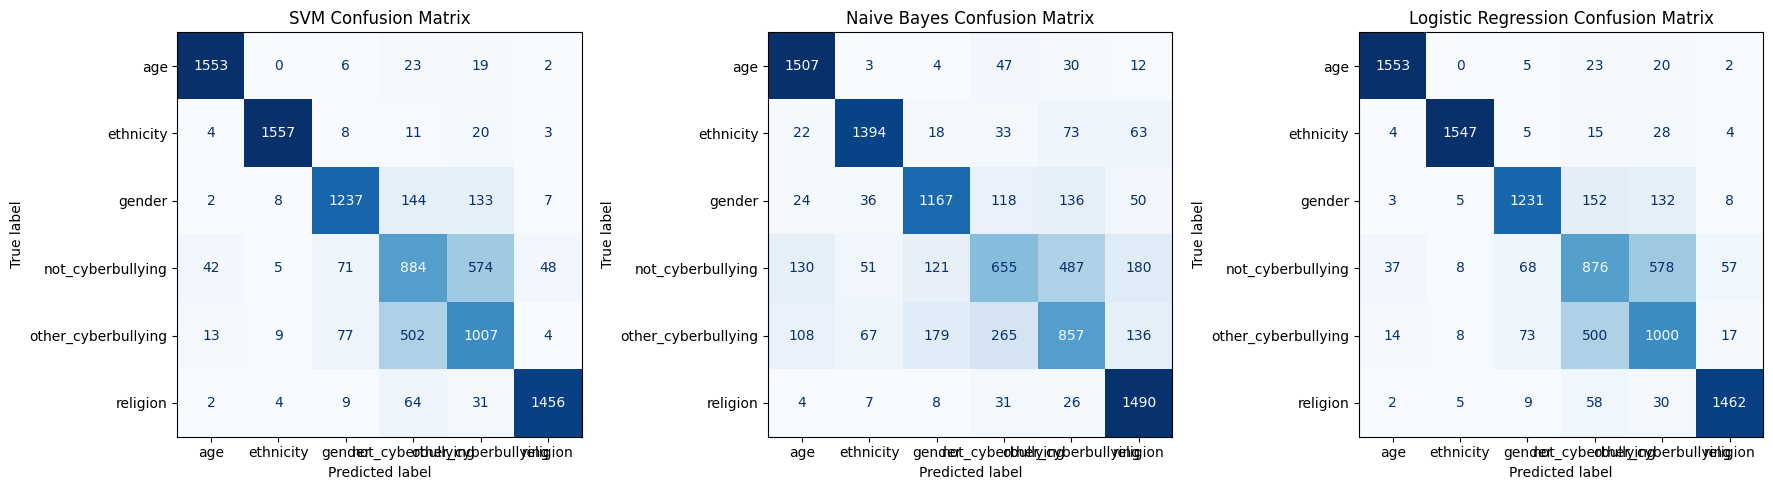

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

# Calculate confusion matrices and accuracies
models = {
    "SVM": (svm_predictions, "SVM"),
    "Naive Bayes": (nb_predictions, "Naive Bayes"),
    "Logistic Regression": (logreg_predictions, "Logistic Regression"),
}

plt.figure(figsize=(18, 5))
for i, (model_name, (predictions, title)) in enumerate(models.items(), 1):
    cm = confusion_matrix(y_test, predictions)
    acc = accuracy_score(y_test, predictions)
    print(f"{model_name} Accuracy: {acc:.2f}")

    # Plot the confusion matrix
    plt.subplot(1, 3, i)
    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm, display_labels=label_encoder.classes_
    )
    disp.plot(ax=plt.gca(), cmap="Blues", colorbar=False)
    plt.title(f"{title} Confusion Matrix")

plt.tight_layout()
plt.show()

In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional

# Tokenize the text
max_words = 5000  # Vocabulary size
max_len = 100  # Max length of sequences

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to ensure equal length
X_train_padded = pad_sequences(
    X_train_seq, maxlen=max_len, padding="post", truncating="post"
)
X_test_padded = pad_sequences(
    X_test_seq, maxlen=max_len, padding="post", truncating="post"
)

# Build the LSTM model
lstm_model = Sequential(
    [
        Embedding(max_words, 128, input_length=max_len),
        LSTM(64, return_sequences=True),
        Dropout(0.2),
        LSTM(32),
        Dense(32, activation="relu"),
        Dense(len(label_encoder.classes_), activation="softmax"),
    ]
)

lstm_model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

c:\Users\srishti\anaconda3\envs\MachineLearning\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
597/597 ━━━━━━━━━━━━━━━━━━━━ 65s 95ms/step - accuracy: 0.1678 - loss: 1.7926 - val_accuracy: 0.1605 - val_loss: 1.7920
Epoch 2/5
597/597 ━━━━━━━━━━━━━━━━━━━━ 96s 118ms/step - accuracy: 0.1733 - loss: 1.7917 - val_accuracy: 0.1642 - val_loss: 1.7921
Epoch 3/5
597/597 ━━━━━━━━━━━━━━━━━━━━ 44s 74ms/step - accuracy: 0.1686 - loss: 1.7917 - val_accuracy: 0.1642 - val_loss: 1.7919
Epoch 4/5
597/597 ━━━━━━━━━━━━━━━━━━━━ 103s 108ms/step - accuracy: 0.1721 - loss: 1.7917 - val_accuracy: 0.1642 - val_loss: 1.7919
Epoch 5/5
597/597 ━━━━━━━━━━━━━━━━━━━━ 73s 122ms/step - accuracy: 0.1697 - loss: 1.7917 - val_accuracy: 0.1605 - val_loss: 1.7922
299/299 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step
LSTM Accuracy: 0.16


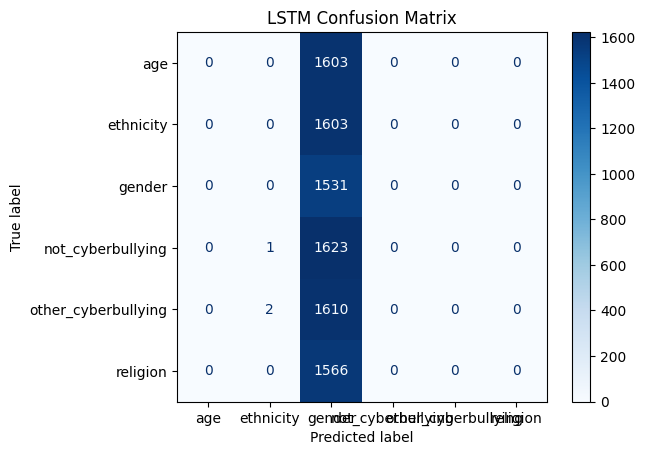

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Train the LSTM model
history = lstm_model.fit(
    X_train_padded,
    y_train,
    validation_data=(X_test_padded, y_test),
    epochs=5,
    batch_size=64,
)

# Predict classes
lstm_predictions = lstm_model.predict(X_test_padded)
lstm_pred_classes = lstm_predictions.argmax(axis=1)

# Calculate accuracy
lstm_accuracy = accuracy_score(y_test, lstm_pred_classes)
print(f"LSTM Accuracy: {lstm_accuracy:.2f}")

# Plot confusion matrix
cm = confusion_matrix(y_test, lstm_pred_classes)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm, display_labels=label_encoder.classes_
)
disp.plot(cmap="Blues")
plt.title("LSTM Confusion Matrix")
plt.show()

299/299 ━━━━━━━━━━━━━━━━━━━━ 5149s 17s/step
Ensemble Accuracy: 0.80


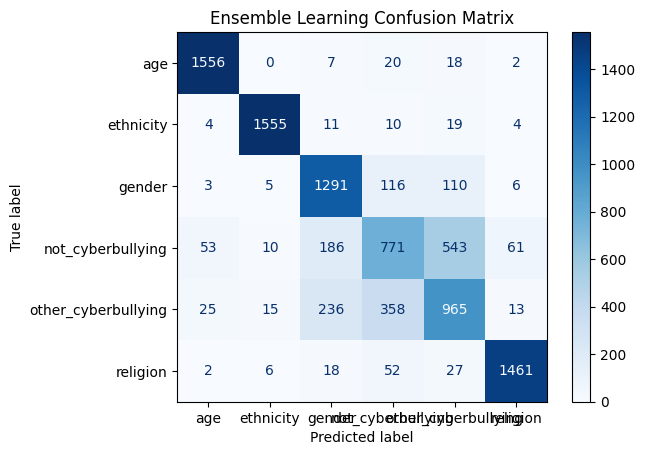

In [13]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Ensemble using Voting Classifier (Hard Voting)
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np


class LSTMClassifier(BaseEstimator, ClassifierMixin):
    """Custom wrapper for LSTM model to integrate with sklearn VotingClassifier."""

    def fit(self, X, y):
        return self  # Already trained

    def predict(self, X):
        lstm_predictions = lstm_model.predict(X)
        return lstm_predictions.argmax(axis=1)


# Define classifiers
voting_clf = VotingClassifier(
    estimators=[
        ("svm", svm_classifier),
        ("nb", nb_classifier),
        ("logreg", logreg_classifier),
        ("lstm", LSTMClassifier()),  # LSTM as part of ensemble
    ],
    voting="hard",
)

# Train and predict
voting_clf.fit(X_train_tfidf, y_train)
ensemble_predictions = voting_clf.predict(X_test_tfidf)

# Accuracy
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
print(f"Ensemble Accuracy: {ensemble_accuracy:.2f}")

# Plot confusion matrix
cm = confusion_matrix(y_test, ensemble_predictions)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm, display_labels=label_encoder.classes_
)
disp.plot(cmap="Blues")
plt.title("Ensemble Learning Confusion Matrix")
plt.show()

In [18]:
import numpy as np


# Function to take input and make a prediction
def predict_cyberbullying(text):
    # Preprocess the input text (same as during training)
    text_transformed = tfidf_vectorizer.transform(
        [text]
    )  # Convert text to TF-IDF features

    # Predict using the ensemble model
    prediction = voting_clf.predict(text_transformed)

    # Map prediction to the label
    predicted_label = label_encoder.inverse_transform(prediction)
    print(f"Predicted Cyberbullying Type: {predicted_label[0]}")


# Take input from user
user_input = input("Enter a tweet or text to classify: ")
predict_cyberbullying(user_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
Predicted Cyberbullying Type: religion
